# Traveling salesman problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [2]:
def calculate_distance(p1: np.array, p2: np.array):
    res = np.sqrt(np.abs(p1[0]-p2[0]) + np.abs(p1[1]-p2[1]))
    return res

def calculate_total_distance(coords: List[np.array]):
    dist = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        dist += calculate_distance(p1, p2)
    dist += calculate_distance(coords[0], coords[-1])
    return dist

In [3]:
coords = []
for i in range(20):
    coords.append([np.random.uniform(), np.random.uniform()])

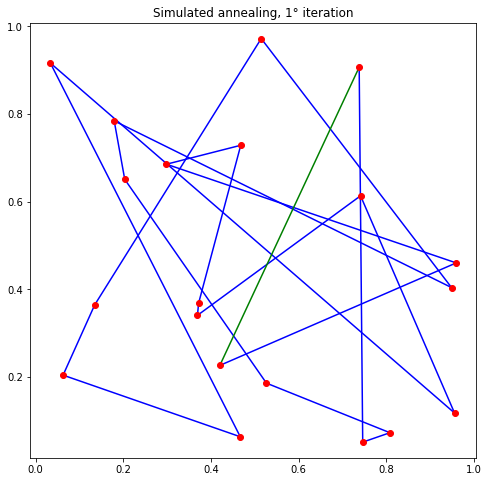

In [4]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

for first, second in zip(coords[:-1], coords[1:]):
    ax1.plot([first[0], second[0]], [first[1], second[1]], 'b')
ax1.plot([coords[0][0], coords[-1][0]], [coords[0][1], coords[-1][1]], 'g')
    
for c in coords:
    ax1.plot(c[0], c[1], 'ro')
    
ax1.set_title('Simulated annealing, 1° iteration')
ax1.axis('equal')

plt.show()

## Simulated annealing algorithm

In [5]:
iteraciones = {}
for i in np.arange(0, 1001, 100):
    iteraciones[i] = ''

In [6]:
cost0 = calculate_total_distance(coords=coords)
best_cost = cost0

T = 100
factor = .99
T_init = T

for i in range(1001):
    if i in np.arange(0, 1001, 100):
        iteraciones[i] = np.array(coords)
    
    T = T*factor
    for j in range(500):
        r1, r2 = np.random.randint(0, len(coords), size=2)
        
        temp = coords[r1]
        coords[r1] = coords[r2]
        coords[r2] = temp 
        
        cost1 = calculate_total_distance(coords)
        
        if cost1 < cost0:
            cost0 = cost1
        
        else:
            x = np.random.uniform()
            if x < np.exp((cost0 - cost1)/T):
                cost0 = cost1
            else:
                temp = coords[r1]
                coords[r1] = coords[r2]
                coords[r2] = temp
    
    if cost0 < best_cost:
        best_cost = cost0

In [7]:
print(f"The minimum cost for the salesman is: {best_cost}")

The minimum cost for the salesman is: 9.267755585088723


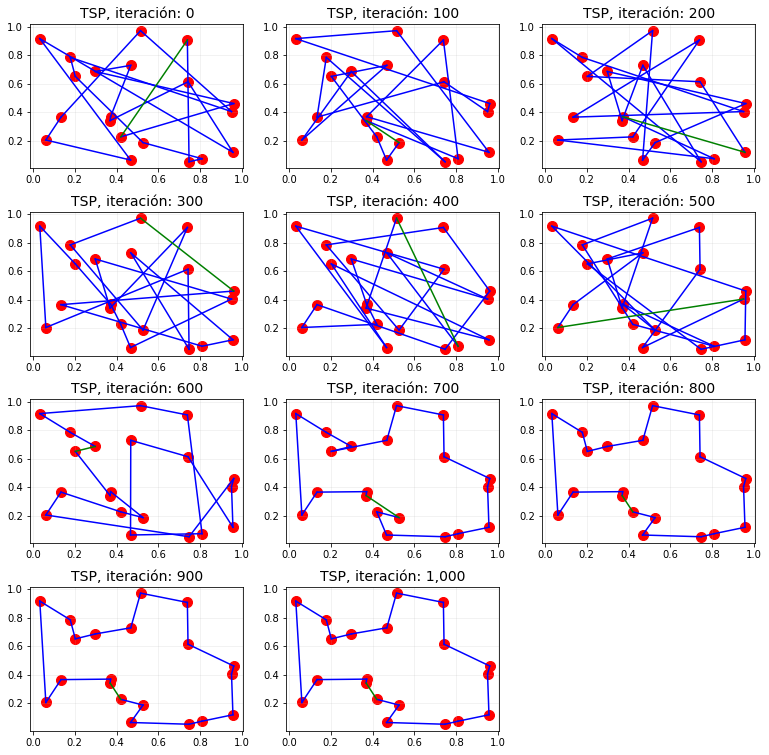

In [11]:
panels = len(iteraciones.keys())

#Parámetros de figura
fig = plt.figure(figsize=(13,13))
spec = plt.GridSpec(ncols=3, nrows=4, hspace=0.3)
k = 0

for k in range(panels):
    #Gráficas
    ax_n = f"ax{k}"
    ax_n = fig.add_subplot(spec[k])
    ax_n.scatter(x=np.array(coords)[:,0], y=np.array(coords)[:,1], c='red', s=100)
    
    #Conexiones
    key = list(iteraciones.keys())[k]
    coords_conn = iteraciones[key]
    for i in range(coords_conn.shape[0]):
        ax_n.plot(coords_conn[i:i+2,0], coords_conn[i:i+2,1], color='blue')
        if i == coords_conn.shape[0]-1:
            ax_n.plot([coords_conn[0][0], coords_conn[-1][0]], [coords_conn[0][1], coords_conn[-1][1]], color='green')

    
    #Anotaciones y estilo
    ax_n.set_title(f"TSP, iteración: {list(iteraciones.keys())[k]:,}", fontsize=14)
    ax_n.set_xlabel('')
    ax_n.grid(alpha=0.2)
    
plt.show()